In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
data=pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
#Encoding these values

In [10]:
data1=data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}})

In [11]:
data1.Fuel_Type.value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [12]:
data1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [13]:
correlation=data1.corr()

<AxesSubplot:>

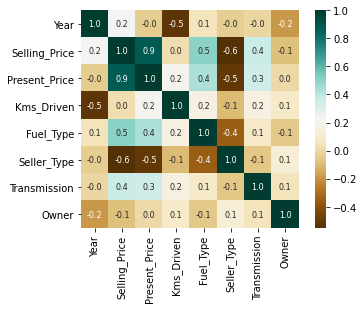

In [14]:
plt.figure()
sas.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='BrBG')

In [15]:
X=data1.drop(['Car_Name','Selling_Price'],axis=1)
Y=data1.Selling_Price

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
linRegMod=LinearRegression()

In [18]:
linRegMod.fit(X_train,Y_train)

LinearRegression()

In [19]:
predictedTrain=linRegMod.predict(X_train)

In [20]:
error1=metrics.mean_absolute_error(Y_train,predictedTrain)
error2=metrics.r2_score(Y_train,predictedTrain)

In [21]:
print("Mean absolute error: ",error1)
print("R square error: ",error2)

Mean absolute error:  1.1998520242147426
R square error:  0.8838169193709792


In [22]:
predictedTest=linRegMod.predict(X_test)

In [23]:
error3=metrics.mean_absolute_error(Y_test,predictedTest)
error4=metrics.r2_score(Y_test,predictedTest)

In [24]:
print("Mean absolute error: ",error3)
print("R square error: ",error4)

Mean absolute error:  1.2671998472916908
R square error:  0.8401532365377782


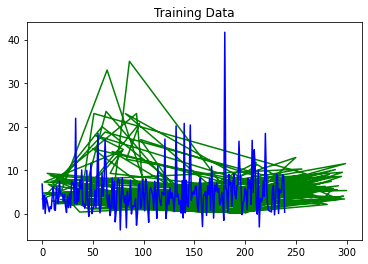

In [25]:
plt.plot(Y_train,color='g',label='Actual Price')
plt.plot(predictedTrain,color='b',label='Predicted Price')
plt.title('Training Data')
plt.show()

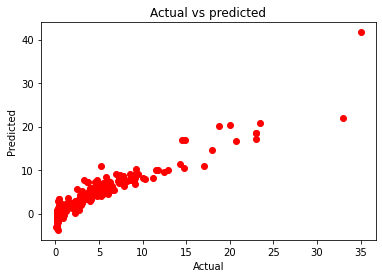

In [26]:
plt.scatter(Y_train,predictedTrain,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
plt.show()

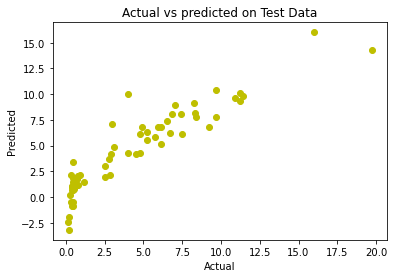

In [27]:
plt.scatter(Y_test,predictedTest,color='y')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted on Test Data')
plt.show()

In [28]:
lassoMod=Lasso()

In [29]:
lassoMod.fit(X_train,Y_train)

Lasso()

In [30]:
predictedTrain=lassoMod.predict(X_train)

In [31]:
error1=metrics.mean_absolute_error(Y_train,predictedTrain)
error2=metrics.r2_score(Y_train,predictedTrain)

In [32]:
print("Mean absolute error: ",error1)
print("R square error: ",error2)

Mean absolute error:  1.2810306200223531
R square error:  0.8435873952582827


In [33]:
predictedTest=lassoMod.predict(X_test)

In [34]:
error3=metrics.mean_absolute_error(Y_test,predictedTest)
error4=metrics.r2_score(Y_test,predictedTest)

In [35]:
print("Mean absolute error: ",error3)
print("R square error: ",error4)

Mean absolute error:  1.1893278434426198
R square error:  0.8497457570738539


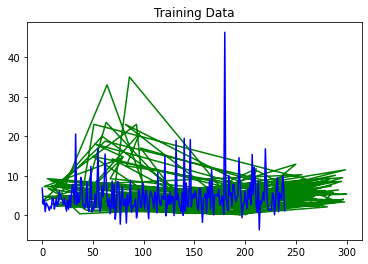

In [36]:
plt.plot(Y_train,color='g',label='Actual Price')
plt.plot(predictedTrain,color='b',label='Predicted Price')
plt.title('Training Data')
plt.show()

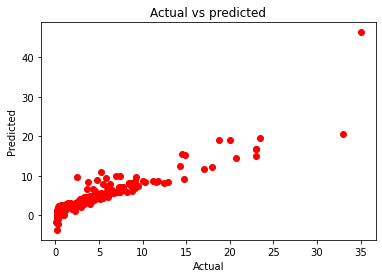

In [37]:
plt.scatter(Y_train,predictedTrain,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
plt.show()

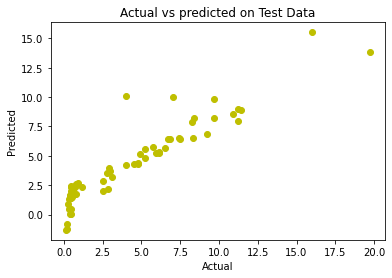

In [41]:
plt.scatter(Y_test,predictedTest,color='y')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted on Test Data')
plt.show()